In [ ]:
'''Sets GPU 0 as the only visible device for TensorFlow and displays all available GPU devices for verification'''

In [ ]:
import os 
# To use only GPU 0:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

In [ ]:
'''🧠 DenseNet201-Based Multi-Class Image Classifier
✅ Imports required libraries (TensorFlow, Keras, NumPy, etc.)
✅ Sets image size, batch size, epochs, and model paths
✅ Loads and augments images from the given dataset folder
✅ Uses pre-trained DenseNet201 (without top layers) as base
✅ Loads custom weights locally into DenseNet201
✅ Freezes first 50 layers to preserve learned features
✅ Adds custom classification head (GAP + Dense + Dropout layers)
✅ Compiles model with Adam optimizer and categorical loss
✅ Saves the untrained model as backup
✅ Defines callbacks: EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint
✅ Trains the model using training and validation generators'''


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

import os
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

print("✅ All packages imported successfully!")

# --- Configuration ---
dataset_dir = r"C:\Users\HFX1KOR\Desktop\balanced_dataset"
LOCAL_DENSENET_WEIGHTS_PATH = r"C:\Users\HFX1KOR\Downloads\densenet201_weights_tf_dim_ordering_tf_kernels_notop (1).h5"
IMG_SIZE = 224
BATCH_SIZE = 8
EPOCHS = 8
FREEZE_LAYERS_COUNT = 50

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training',
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

num_classes = train_generator.num_classes
print(f"✅ Found {num_classes} classes: {train_generator.class_indices}")

# --- Model ---
print("📦 Loading DenseNet201 base model...")
base_model = DenseNet201(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

print(f"🔗 Loading weights from: {LOCAL_DENSENET_WEIGHTS_PATH}")
try:
    base_model.load_weights(LOCAL_DENSENET_WEIGHTS_PATH)
    print("✅ DenseNet201 weights loaded successfully from local file!")
except Exception as e:
    print(f"❌ Error loading weights: {e}")
    exit()

# --- Freeze Bottom Layers ---
print(f"⛔ Freezing bottom {FREEZE_LAYERS_COUNT} layers...")
for i, layer in enumerate(base_model.layers):
    if i < FREEZE_LAYERS_COUNT:
        layer.trainable = False
    else:
        layer.trainable = True

trainable_layers = [layer.name for layer in base_model.layers if layer.trainable]
print(f"✅ Number of trainable layers: {len(trainable_layers)}")

# --- Add Classification Head ---
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print("\n🧠 Model Summary:")
model.summary()

# --- Save Untrained Model ---
untrained_model_path = r"C:\Users\HFX1KOR\Desktop\densenet_untrained_model.h5"
model.save(untrained_model_path)
print(f"📦 Untrained model saved at: {untrained_model_path}")

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
checkpoint_cb = ModelCheckpoint(
    filepath=r"C:\Users\HFX1KOR\Desktop\densenet_checkpoint.weights.h5",  # ✅ FIXED
    monitor="val_loss",
    save_best_only=False,
    save_weights_only=True,
    save_freq='epoch',
    verbose=1
)


# --- Training ---
print(f"\n🚀 Starting training for {EPOCHS} epochs...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint_cb]
)



✅ All packages imported successfully!
Found 112000 images belonging to 4 classes.
Found 27999 images belonging to 4 classes.
✅ Found 4 classes: {'cancer': 0, 'high_grade': 1, 'low_grade': 2, 'normal': 3}
📦 Loading DenseNet201 base model...
🔗 Loading weights from: C:\Users\HFX1KOR\Downloads\densenet201_weights_tf_dim_ordering_tf_kernels_notop (1).h5
✅ DenseNet201 weights loaded successfully from local file!
⛔ Freezing bottom 50 layers...
✅ Number of trainable layers: 657

🧠 Model Summary:
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                              

NameError: name 'sns' is not defined

<Figure size 800x800 with 0 Axes>

In [ ]:
'''saving the trained model to the directory'''

from tensorflow.keras.models import save_model

final_model_path = r"C:\Users\HFX1KOR\Desktop\densenet_trained_model_recovery.h5"
model.save(final_model_path)
print(f"✅ Model saved successfully at: {final_model_path}")


✅ Model saved successfully at: C:\Users\HFX1KOR\Desktop\densenet_trained_model_recovery.h5


✅ Trained model loaded successfully!
Found 27999 images belonging to 4 classes.
3500/3500 [==============================] - 448s 124ms/step

🧾 Classification Report:
              precision    recall  f1-score   support

      cancer     0.8522    0.8830    0.8673      6999
  high_grade     0.8787    0.8317    0.8545      7000
   low_grade     0.9853    0.9974    0.9913      7000
      normal     0.9922    0.9971    0.9947      7000

    accuracy                         0.9273     27999
   macro avg     0.9271    0.9273    0.9270     27999
weighted avg     0.9271    0.9273    0.9270     27999



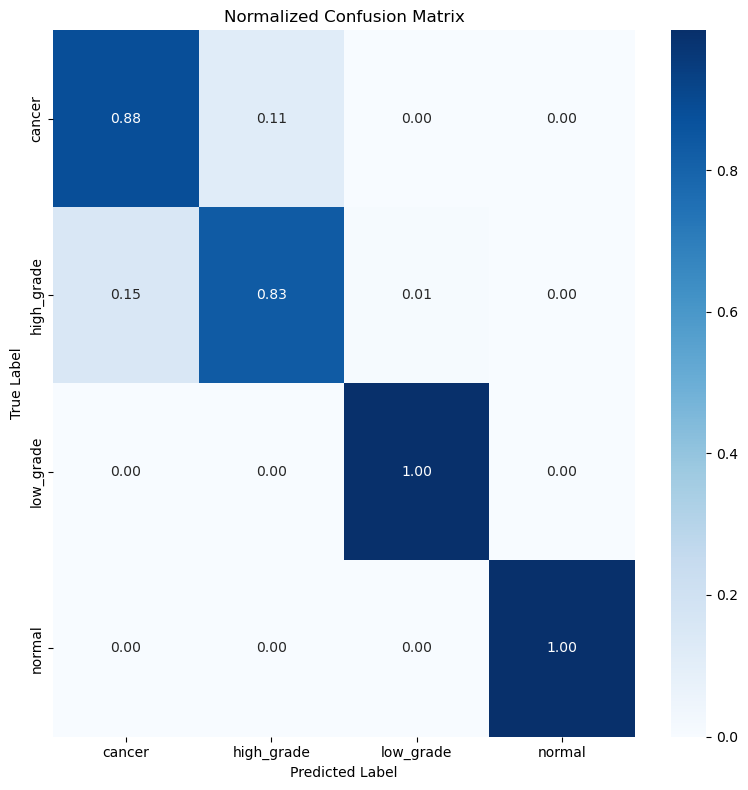

In [ ]:
'''To evaluate the performance of the model by generating a classification report and by normalized confusion matrix'''

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# --- Config ---
model_path = r"C:\Users\HFX1KOR\Desktop\densenet_trained_model_recovery.h5"
dataset_dir = r"C:\Users\HFX1KOR\Desktop\balanced_dataset"
IMG_SIZE = 224
BATCH_SIZE = 8

# --- Load Model ---
model = load_model(model_path)
print("✅ Trained model loaded successfully!")

# --- Prepare Validation Data Generator ---
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_generator = datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# --- Predict ---
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# --- Classification Report ---
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))

# --- Normalized Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred, normalize='true')

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
'''Predicting a single test image with a trained model weights '''

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing import image
import os

# --- Configuration ---
IMG_SIZE = 224
NUM_CLASSES = 4  # Make sure this matches your dataset
weights_path = r"C:\Users\HFX1KOR\Desktop\densenet_checkpoint.weights.h5"

# --- Load class labels (from previous generator or manually) ---
class_labels = ['cancer', 'high_grade', 'low_grade', 'normal']  # 🔁 Update if needed

# --- Rebuild Model Architecture ---
base_model = DenseNet201(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- Load Weights ---
model.load_weights(weights_path)
print("✅ Trained weights loaded successfully!")

# --- Load and Preprocess Test Image ---
test_image_path = r"C:\Users\HFX1KOR\Desktop\balanced_dataset\normal\NL_1_ (1)_cell_001.png" # 🔁 Update path
img = image.load_img(test_image_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale

# --- Predict ---
pred_prob = model.predict(img_array)
pred_class_index = np.argmax(pred_prob)
pred_class_label = class_labels[pred_class_index]

# --- Display Results ---
print("🖼️ Image Path:", test_image_path)
print("🔍 Predicted Class:", pred_class_label)
print("📊 Confidence Score:", round(pred_prob[0][pred_class_index] * 100, 2), "%")


✅ Trained weights loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
🖼️ Image Path: C:\Users\HFX1KOR\Desktop\balanced_dataset\normal\NL_1_ (1)_cell_001.png
🔍 Predicted Class: normal
📊 Confidence Score: 100.0 %


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
✅ Segmented and saved 119 cells to: C:\Users\HFX1KOR\Desktop\test_cells


saving_lib.py (802): Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 1136 variables. 


✅ Trained model loaded.

🔍 Classification Results for Test Image:
test_cell_001.png: Predicted → normal (0.99)
test_cell_009.png: Predicted → normal (1.00)
test_cell_011.png: Predicted → normal (1.00)
test_cell_012.png: Predicted → normal (1.00)
test_cell_016.png: Predicted → normal (1.00)
test_cell_017.png: Predicted → low_grade (0.69)
test_cell_018.png: Predicted → normal (1.00)
test_cell_019.png: Predicted → normal (1.00)
test_cell_022.png: Predicted → normal (1.00)
test_cell_035.png: Predicted → normal (1.00)
test_cell_036.png: Predicted → normal (1.00)
test_cell_041.png: Predicted → normal (1.00)
test_cell_044.png: Predicted → low_grade (1.00)
test_cell_056.png: Predicted → normal (1.00)
test_cell_069.png: Predicted → normal (1.00)
test_cell_072.png: Predicted → normal (1.00)
test_cell_083.png: Predicted → normal (1.00)
test_cell_086.png: Predicted → normal (1.00)
test_cell_091.png: Predicted → normal (1.00)
test_cell_097.png: Predicted → normal (1.00)
test_cell_1008.png: Predicte

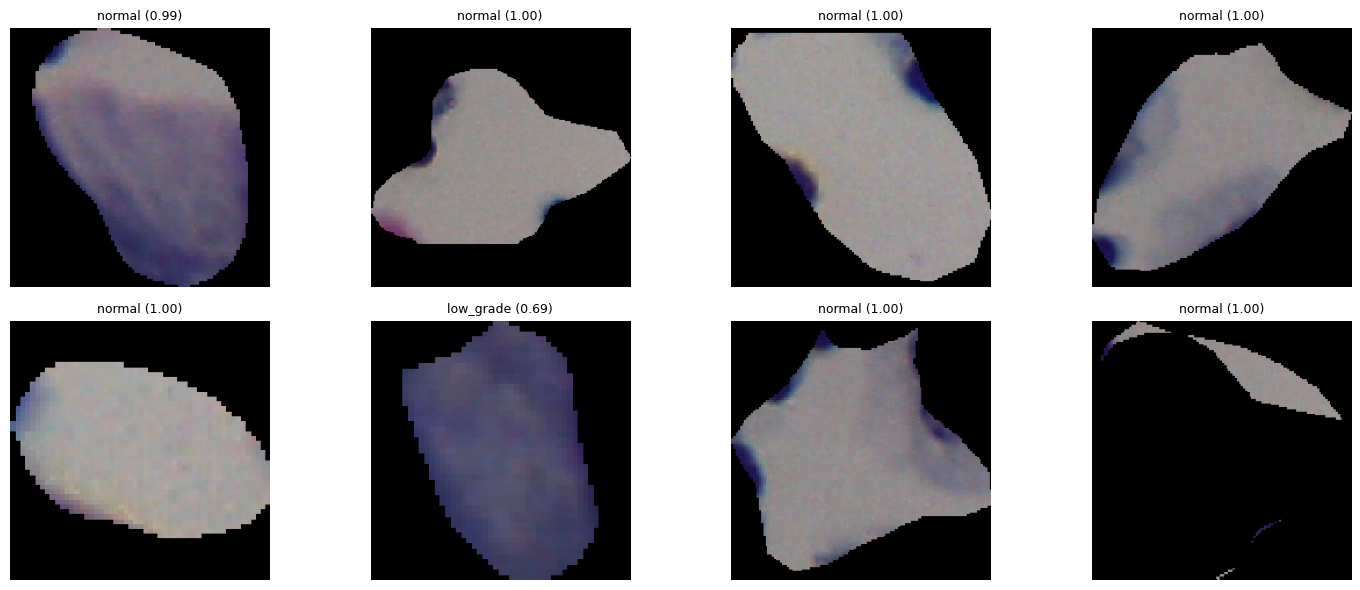

In [ ]:
'''Performs segmentation of cervical cells from a WSI image and classifies each cell using a trained DenseNet201 model'''

import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# === CONFIGURATION ===
IMG_SIZE = 224
CLASS_NAMES = ['cancer', 'high_grade', 'low_grade', 'normal']  # match the refined_dataset structure
INPUT_IMAGE = r"C:\Users\HFX1KOR\Desktop\Cervical_LBC_Project\LBC_data\Negative for Intraepithelial malignancy\NL_1_ (1).jpg" # change to your test image
SEGMENTED_OUTPUT_DIR = r"C:\Users\HFX1KOR\Desktop\test_cells"  # temp location to save segmented patches
MODEL_WEIGHTS_PATH = r"C:\Users\HFX1KOR\Desktop\densenet_checkpoint.weights.h5"

# === Clean previous outputs if exist ===
if os.path.exists(SEGMENTED_OUTPUT_DIR):
    import shutil
    shutil.rmtree(SEGMENTED_OUTPUT_DIR)
os.makedirs(SEGMENTED_OUTPUT_DIR, exist_ok=True)

# === Step 1: Load and Segment Test Image using Stardist ===
from stardist.models import StarDist2D
from skimage.morphology import remove_small_objects, closing, disk

def segment_test_image(image_path, output_dir, model_path):
    model = StarDist2D(None, name='2D_versatile_fluo', basedir=model_path)

    img_color = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_f = img_gray.astype(np.float32)
    img_norm = (img_f - img_f.min()) / (img_f.max() - img_f.min())

    labels, _ = model.predict_instances(img_norm, prob_thresh=0.1, nms_thresh=0.95)
    labels = remove_small_objects(labels, min_size=1000)

    for lbl in np.unique(labels):
        if lbl == 0: continue
        m = labels == lbl
        m_closed = closing(m, disk(3))
        labels[m_closed] = lbl

    num_cells = labels.max()
    saved = 0
    for i in range(1, num_cells + 1):
        mask = (labels == i)
        if mask.sum() < 50:
            continue

        cell_img = np.zeros_like(img_color)
        cell_img[mask] = img_color[mask]

        ys, xs = np.where(mask)
        y0, x0 = ys.min(), xs.min()
        y1, x1 = ys.max(), xs.max()
        crop = cell_img[y0:y1 + 1, x0:x1 + 1]

        resized = resize_and_pad(crop, (IMG_SIZE, IMG_SIZE))
        out_path = os.path.join(output_dir, f"test_cell_{i:03d}.png")
        cv2.imwrite(out_path, resized)
        saved += 1

    print(f"✅ Segmented and saved {saved} cells to: {output_dir}")

def resize_and_pad(image, target_size):
    h, w = image.shape[:2]
    target_h, target_w = target_size
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)

    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

    final_image = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    top = (target_h - new_h) // 2
    left = (target_w - new_w) // 2
    final_image[top:top + new_h, left:left + new_w] = resized_image
    return final_image

# Run segmentation
segment_test_image(INPUT_IMAGE, SEGMENTED_OUTPUT_DIR, r"C:\Users\HFX1KOR\Documents\python_2D_versatile_fluo")

# === Step 2: Build and Load the Model with Saved Weights ===
def build_model(num_classes):
    base_model = DenseNet201(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.load_weights(r"C:\Users\HFX1KOR\Downloads\densenet201_weights_tf_dim_ordering_tf_kernels_notop (1).h5")
    
    for i, layer in enumerate(base_model.layers):
        if i < 50:
            layer.trainable = False
        else:
            layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    model.load_weights(MODEL_WEIGHTS_PATH)
    print("✅ Trained model loaded.")
    return model

model = build_model(num_classes=len(CLASS_NAMES))

# === Step 3: Predict Classes for Each Segmented Cell ===
def predict_cells(model, image_dir, class_names):
    image_paths = sorted(glob(os.path.join(image_dir, "*.png")))
    predictions = []

    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img_to_array(img)
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)

        pred = model.predict(img, verbose=0)[0]
        class_id = np.argmax(pred)
        class_label = class_names[class_id]
        confidence = pred[class_id]

        predictions.append((os.path.basename(img_path), class_label, confidence))

    return predictions

# Run prediction
results = predict_cells(model, SEGMENTED_OUTPUT_DIR, CLASS_NAMES)

# === Step 4: Display Predictions ===
print("\n🔍 Classification Results for Test Image:")
for file, label, conf in results:
    print(f"{file}: Predicted → {label} ({conf:.2f})")

# Optionally visualize some results
plt.figure(figsize=(15, 6))
for idx, (file, label, conf) in enumerate(results[:8]):
    img = cv2.imread(os.path.join(SEGMENTED_OUTPUT_DIR, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 4, idx + 1)
    plt.imshow(img)
    plt.title(f"{label} ({conf:.2f})", fontsize=9)
    plt.axis("off")
plt.tight_layout()
plt.show()


✅ Saved model loaded successfully.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.

--- Summary ---
Predicted class: Cancer
Cell count: Cancer: 63
Cell count: High_grade: 56
Cell count: Low_grade: 0
⚠️ Attention needed: 119 abnormal cells detected.


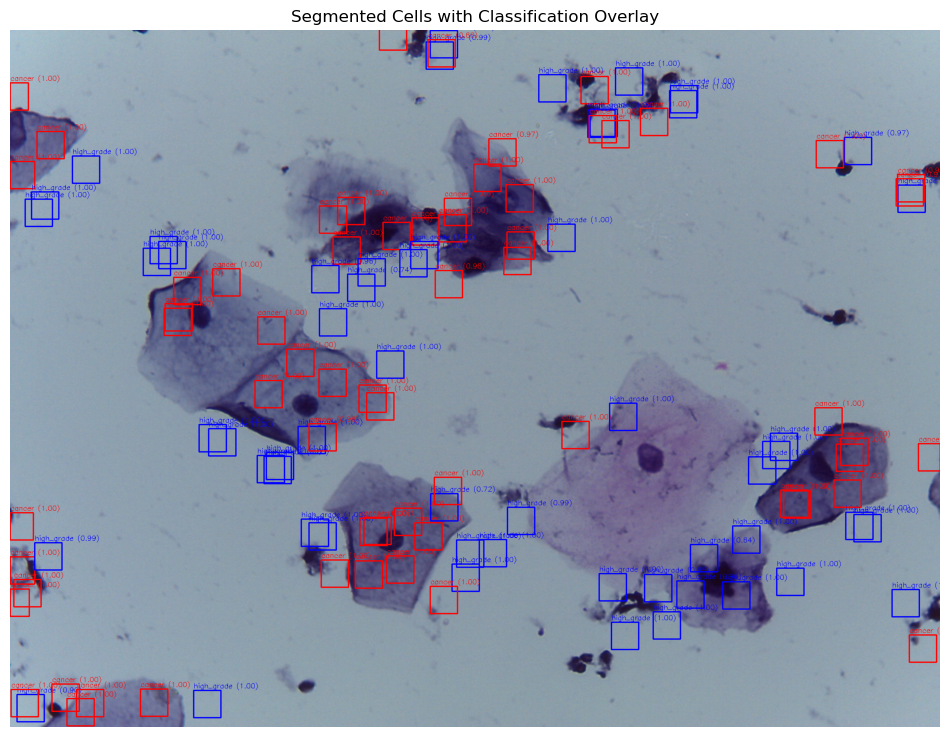


Overlay image saved at: C:\Users\HFX1KOR\Desktop\final_overlay_output(1).png

📌 Final Results Summary:
majority_class: cancer
class_counts: {'cancer': 63, 'high_grade': 56, 'low_grade': 0}
alert_message: ⚠️ Attention needed: 119 abnormal cells detected.
abnormal_cells_coords: 119 items
alert: True
abnormal_count: 119


In [ ]:
'''Performs automated cervical cell segmentation, classification, and abnormality alert generation using a trained model and StarDist'''
import os
import cv2
import numpy as np
from stardist.models import StarDist2D
from skimage.morphology import remove_small_objects, closing, disk
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from collections import Counter

# --- CONFIG ---
IMG_SIZE = 224
CELL_SIZE = (IMG_SIZE, IMG_SIZE)
BLACK_INTENSITY_THRESHOLD = 10
BLACK_PIXEL_RATIO_THRESHOLD = 0.80

CLASS_NAMES = ['cancer', 'high_grade', 'low_grade', 'normal']
ABNORMAL_CLASSES = set(['cancer', 'high_grade', 'low_grade'])

# --- Helper Functions ---

def resize_and_pad(image, target_size):
    h, w = image.shape[:2]
    target_h, target_w = target_size
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
    final_image = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    top = (target_h - new_h) // 2
    left = (target_w - new_w) // 2
    final_image[top:top + new_h, left:left + new_w] = resized_image
    return final_image

def load_saved_model(model_path):
    model = load_model(model_path)
    print("✅ Saved model loaded successfully.")
    return model

def segment_cells(image_path, model_dir):
    model = StarDist2D(None, name='2D_versatile_fluo', basedir=model_dir)
    img_color = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_f = img_gray.astype(np.float32)
    img_norm = (img_f - img_f.min()) / (img_f.max() - img_f.min())

    labels, _ = model.predict_instances(img_norm, prob_thresh=0.1, nms_thresh=0.95)
    labels = remove_small_objects(labels, min_size=1000)

    for lbl in np.unique(labels):
        if lbl == 0:
            continue
        m = labels == lbl
        m_closed = closing(m, disk(3))
        labels[m_closed] = lbl

    return img_color, labels

def extract_cells_and_coords(img_color, labels):
    cells = []
    coords = []
    for i in range(1, labels.max() + 1):
        mask = labels == i
        if mask.sum() < 50:
            continue
        ys, xs = np.where(mask)
        y0, x0 = ys.min(), xs.min()
        y1, x1 = ys.max(), xs.max()
        crop = img_color[y0:y1 + 1, x0:x1 + 1]
        resized = resize_and_pad(crop, CELL_SIZE)
        cells.append(resized)
        coords.append((x0, y0, x1, y1))
    return cells, coords

def filter_black_cells(cells, threshold=BLACK_PIXEL_RATIO_THRESHOLD):
    filtered_cells = []
    filtered_indices = []
    for i, cell in enumerate(cells):
        gray = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
        total_pixels = gray.size
        black_pixels = np.sum(gray < BLACK_INTENSITY_THRESHOLD)
        black_ratio = black_pixels / total_pixels
        if black_ratio < threshold:
            filtered_cells.append(cell)
            filtered_indices.append(i)
    return filtered_cells, filtered_indices

def predict_cells(model, cells):
    preds = []
    for cell in cells:
        x = img_to_array(cell)
        x = preprocess_input(x)
        x = np.expand_dims(x, axis=0)
        pred = model.predict(x, verbose=0)[0]
        preds.append(pred)
    return preds

def overlay_predictions_on_image(img, coords, preds, class_names, abnormal_classes, alert_threshold=0, majority_class_count=0):
    overlay_img = img.copy()
    abnormal_count = 0
    abnormal_cells_coords = []
    class_counts = Counter([class_names[np.argmax(p)] for p in preds])

    class_colors = {
        'cancer': (0, 0, 255),        # Red
        'high_grade': (255, 0, 0),    # Blue
        'low_grade': (0, 165, 255)    # Orange
    }

    box_half_size = 30

    for (x0, y0, x1, y1), pred in zip(coords, preds):
        class_id = np.argmax(pred)
        class_label = class_names[class_id]
        confidence = pred[class_id]
        count_for_class = class_counts[class_label]

        if class_label in abnormal_classes and count_for_class >= 0.05 * majority_class_count and confidence > 0.5:
            cx = (x0 + x1) // 2
            cy = (y0 + y1) // 2
            fx0, fy0 = max(0, cx - box_half_size), max(0, cy - box_half_size)
            fx1, fy1 = min(img.shape[1], cx + box_half_size), min(img.shape[0], cy + box_half_size)

            color = class_colors[class_label]
            cv2.rectangle(overlay_img, (fx0, fy0), (fx1, fy1), color, 2)
            text = f"{class_label} ({confidence:.2f})"
            cv2.putText(overlay_img, text, (fx0, max(0, fy0 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

            abnormal_count += 1
            abnormal_cells_coords.append((fx0, fy0, fx1, fy1))

    alert = False
    alert_message = ""
    if abnormal_count > alert_threshold:
        alert = True
        alert_message = f"⚠️ Attention needed: {abnormal_count} abnormal cells detected."
    else:
        alert_message = f"✅ No significant abnormality detected: {abnormal_count} abnormal cells (threshold {alert_threshold})."

    return overlay_img, alert, alert_message, abnormal_count, abnormal_cells_coords

# === Evaluation Pipeline ===
def evaluate_image(image_path, model_path, stardist_model_dir, black_pixel_ratio_threshold=BLACK_PIXEL_RATIO_THRESHOLD):
    model = load_saved_model(model_path)
    img_color, labels = segment_cells(image_path, stardist_model_dir)
    cells, coords = extract_cells_and_coords(img_color, labels)
    filtered_cells, filtered_indices = filter_black_cells(cells, black_pixel_ratio_threshold)

    if not filtered_cells:
        print("No cells left after filtering. Exiting.")
        return None

    preds = predict_cells(model, filtered_cells)
    filtered_coords = [coords[i] for i in filtered_indices]
    predicted_classes = [CLASS_NAMES[np.argmax(p)] for p in preds]
    class_counts = Counter(predicted_classes)
    majority_class, majority_count = class_counts.most_common(1)[0]

    if majority_class == 'normal':
        print("✅ Majority cells predicted as normal. No abnormal cell counting or alert generated.")
        overlay_img = img_color.copy()
        for (x0, y0, x1, y1) in filtered_coords:
            cv2.rectangle(overlay_img, (x0, y0), (x1, y1), (0, 255, 0), 1)
        plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
        plt.title("All segmented cells predicted as NORMAL")
        plt.axis("off")
        plt.show()
        return overlay_img, None

    abnormal_class_counts = {cls: class_counts.get(cls, 0) for cls in ['cancer', 'high_grade', 'low_grade']}

    print("\n--- Summary ---")
    print(f"Predicted class: {majority_class.capitalize()}")
    for cls in ['cancer', 'high_grade', 'low_grade']:
        print(f"Cell count: {cls.capitalize()}: {abnormal_class_counts.get(cls, 0)}")

    dynamic_threshold = int(0.05 * majority_count)

    overlay_img, alert, alert_msg, abnormal_count, abnormal_cells_coords = overlay_predictions_on_image(
        img_color, filtered_coords, preds, CLASS_NAMES, ABNORMAL_CLASSES,
        alert_threshold=dynamic_threshold,
        majority_class_count=majority_count
    )

    print(alert_msg)
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Cells with Classification Overlay")
    plt.axis("off")
    plt.show()

    OUTPUT_PATH = r"C:\Users\HFX1KOR\Desktop\final_overlay_output(1).png"
    cv2.imwrite(OUTPUT_PATH, overlay_img)
    print(f"\nOverlay image saved at: {OUTPUT_PATH}")

    return overlay_img, {
        "majority_class": majority_class,
        "class_counts": abnormal_class_counts,
        "alert_message": alert_msg,
        "abnormal_cells_coords": abnormal_cells_coords,
        "alert": alert,
        "abnormal_count": abnormal_count
    }

# === USAGE ===
if __name__ == "__main__":
    INPUT_IMAGE_PATH = r"C:\Users\HFX1KOR\Desktop\Cervical_LBC_Project\LBC_data\Negative for Intraepithelial malignancy\NL_14_ (2).jpg"
    MODEL_PATH = r"C:\Users\HFX1KOR\Desktop\densenet_trained_model_recovery.h5"
    STARDIST_MODEL_DIR = r"C:\Users\HFX1KOR\Documents\python_2D_versatile_fluo"

    overlay_image, results = evaluate_image(INPUT_IMAGE_PATH, MODEL_PATH, STARDIST_MODEL_DIR)

    if results:
        print("\n📌 Final Results Summary:")
        for key, value in results.items():
            if isinstance(value, list):
                print(f"{key}: {len(value)} items")
            else:
                print(f"{key}: {value}")


✅ Saved model loaded successfully.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.

--- Summary ---
Predicted class: Cancer
Cell count: Cancer: 69
Cell count: High_grade: 36
Cell count: Low_grade: 3
Cell count: Normal: 13
⚠️ Attention needed: 105 abnormal cells detected.


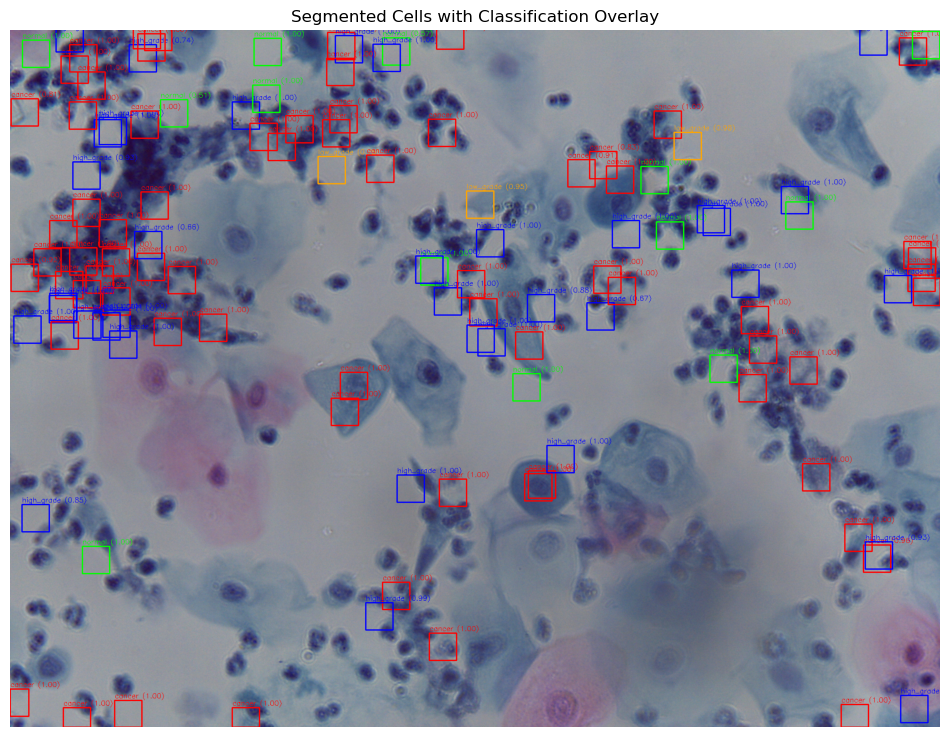


Overlay image saved at: C:\Users\HFX1KOR\Desktop\final_overlay_output(1).png

📌 Final Results Summary:
majority_class: cancer
class_counts: Counter({'cancer': 69, 'high_grade': 36, 'normal': 13, 'low_grade': 3})
alert_message: ⚠️ Attention needed: 105 abnormal cells detected.
abnormal_cells_coords: 105 items
alert: True
abnormal_count: 105


In [ ]:
'''Performs automated cervical cell segmentation, classification, and abnormality alert generation using a trained model and StarDist'''

import os
import cv2
import numpy as np
from stardist.models import StarDist2D
from skimage.morphology import remove_small_objects, closing, disk
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from collections import Counter

# --- CONFIG ---
IMG_SIZE = 224
CELL_SIZE = (IMG_SIZE, IMG_SIZE)
BLACK_INTENSITY_THRESHOLD = 10
BLACK_PIXEL_RATIO_THRESHOLD = 0.80

CLASS_NAMES = ['cancer', 'high_grade', 'low_grade', 'normal']
ABNORMAL_CLASSES = set(['cancer', 'high_grade', 'low_grade'])

# Class-specific confidence thresholds to balance predictions
CLASS_CONFIDENCE_THRESHOLD = {'cancer': 0.7, 'high_grade': 0.6, 'low_grade': 0.5, 'normal': 0.4}

# --- Helper Functions ---

def resize_and_pad(image, target_size):
    h, w = image.shape[:2]
    target_h, target_w = target_size
    scale = min(target_w / w, target_h / h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
    final_image = np.zeros((target_h, target_w, 3), dtype=np.uint8)
    top = (target_h - new_h) // 2
    left = (target_w - new_w) // 2
    final_image[top:top + new_h, left:left + new_w] = resized_image
    return final_image

def load_saved_model(model_path):
    model = load_model(model_path)
    print("✅ Saved model loaded successfully.")
    return model

def segment_cells(image_path, model_dir):
    model = StarDist2D(None, name='2D_versatile_fluo', basedir=model_dir)
    img_color = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_f = img_gray.astype(np.float32)
    img_norm = (img_f - img_f.min()) / (img_f.max() - img_f.min())

    labels, _ = model.predict_instances(img_norm, prob_thresh=0.15, nms_thresh=0.9)
    labels = remove_small_objects(labels, min_size=1000)

    for lbl in np.unique(labels):
        if lbl == 0:
            continue
        m = labels == lbl
        m_closed = closing(m, disk(3))
        labels[m_closed] = lbl

    # Validate segmentation by ensuring minimum cell size
    if np.max(labels) < 1:
        print("⚠️ No valid cells segmented. Adjusting threshold.")
        labels, _ = model.predict_instances(img_norm, prob_thresh=0.05, nms_thresh=0.95)
    return img_color, labels

def extract_cells_and_coords(img_color, labels):
    cells = []
    coords = []
    for i in range(1, labels.max() + 1):
        mask = labels == i
        if mask.sum() < 50:
            continue
        ys, xs = np.where(mask)
        y0, x0 = ys.min(), xs.min()
        y1, x1 = ys.max(), xs.max()
        crop = img_color[y0:y1 + 1, x0:x1 + 1]
        resized = resize_and_pad(crop, CELL_SIZE)
        cells.append(resized)
        coords.append((x0, y0, x1, y1))
    return cells, coords

def filter_black_cells(cells, threshold=BLACK_PIXEL_RATIO_THRESHOLD):
    filtered_cells = []
    filtered_indices = []
    for i, cell in enumerate(cells):
        gray = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
        total_pixels = gray.size
        black_pixels = np.sum(gray < BLACK_INTENSITY_THRESHOLD)
        black_ratio = black_pixels / total_pixels
        if black_ratio < threshold:
            filtered_cells.append(cell)
            filtered_indices.append(i)
    return filtered_cells, filtered_indices

def predict_cells(model, cells):
    preds = []
    for cell in cells:
        x = img_to_array(cell)
        x = preprocess_input(x)
        x = np.expand_dims(x, axis=0)
        pred = model.predict(x, verbose=0)[0]
        preds.append(pred)
    return preds

def balance_class_predictions(preds, coords, class_names, class_thresholds):
    balanced_preds = []
    balanced_coords = []
    for pred, coord in zip(preds, coords):
        class_id = np.argmax(pred)
        class_label = class_names[class_id]
        confidence = pred[class_id]
        if confidence >= class_thresholds[class_label]:
            balanced_preds.append(pred)
            balanced_coords.append(coord)
    return balanced_preds, balanced_coords

def overlay_predictions_on_image(img, coords, preds, class_names, abnormal_classes, alert_threshold=0, majority_class_count=0):
    overlay_img = img.copy()
    abnormal_count = 0
    abnormal_cells_coords = []
    class_counts = Counter([class_names[np.argmax(p)] for p in preds])

    class_colors = {
        'cancer': (0, 0, 255),        # Red
        'high_grade': (255, 0, 0),    # Blue
        'low_grade': (0, 165, 255),   # Orange
        'normal': (0, 255, 0)         # Green
    }

    box_half_size = 30

    for (x0, y0, x1, y1), pred in zip(coords, preds):
        class_id = np.argmax(pred)
        class_label = class_names[class_id]
        confidence = pred[class_id]
        count_for_class = class_counts[class_label]

        cx = (x0 + x1) // 2
        cy = (y0 + y1) // 2
        fx0, fy0 = max(0, cx - box_half_size), max(0, cy - box_half_size)
        fx1, fy1 = min(img.shape[1], cx + box_half_size), min(img.shape[0], cy + box_half_size)

        color = class_colors[class_label]
        cv2.rectangle(overlay_img, (fx0, fy0), (fx1, fy1), color, 2)
        text = f"{class_label} ({confidence:.2f})"
        cv2.putText(overlay_img, text, (fx0, max(0, fy0 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

        if class_label in abnormal_classes and count_for_class >= 0.05 * majority_class_count and confidence > 0.5:
            abnormal_count += 1
            abnormal_cells_coords.append((fx0, fy0, fx1, fy1))

    alert = False
    alert_message = ""
    if abnormal_count > alert_threshold:
        alert = True
        alert_message = f"⚠️ Attention needed: {abnormal_count} abnormal cells detected."
    else:
        alert_message = f"✅ No significant abnormality detected: {abnormal_count} abnormal cells (threshold {alert_threshold})."

    return overlay_img, alert, alert_message, abnormal_count, abnormal_cells_coords

# === Evaluation Pipeline ===
def evaluate_image(image_path, model_path, stardist_model_dir, black_pixel_ratio_threshold=BLACK_PIXEL_RATIO_THRESHOLD):
    model = load_saved_model(model_path)
    img_color, labels = segment_cells(image_path, stardist_model_dir)
    cells, coords = extract_cells_and_coords(img_color, labels)
    filtered_cells, filtered_indices = filter_black_cells(cells, black_pixel_ratio_threshold)

    if not filtered_cells:
        print("No cells left after filtering. Exiting.")
        return None

    preds = predict_cells(model, filtered_cells)
    filtered_coords = [coords[i] for i in filtered_indices]
    balanced_preds, balanced_coords = balance_class_predictions(preds, filtered_coords, CLASS_NAMES, CLASS_CONFIDENCE_THRESHOLD)
    predicted_classes = [CLASS_NAMES[np.argmax(p)] for p in balanced_preds]
    class_counts = Counter(predicted_classes)
    majority_class, majority_count = class_counts.most_common(1)[0]

    if majority_class == 'normal':
        print("✅ Majority cells predicted as normal. No abnormal cell counting or alert generated.")
        overlay_img = img_color.copy()
        for (x0, y0, x1, y1) in balanced_coords:
            cv2.rectangle(overlay_img, (x0, y0), (x1, y1), (0, 255, 0), 1)
        plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
        plt.title("All segmented cells predicted as NORMAL")
        plt.axis("off")
        plt.show()
        return overlay_img, None

    abnormal_class_counts = {cls: class_counts.get(cls, 0) for cls in ['cancer', 'high_grade', 'low_grade']}

    print("\n--- Summary ---")
    print(f"Predicted class: {majority_class.capitalize()}")
    for cls in ['cancer', 'high_grade', 'low_grade', 'normal']:
        print(f"Cell count: {cls.capitalize()}: {class_counts.get(cls, 0)}")

    dynamic_threshold = int(0.05 * majority_count)

    overlay_img, alert, alert_msg, abnormal_count, abnormal_cells_coords = overlay_predictions_on_image(
        img_color, balanced_coords, balanced_preds, CLASS_NAMES, ABNORMAL_CLASSES,
        alert_threshold=dynamic_threshold,
        majority_class_count=majority_count
    )

    print(alert_msg)
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Cells with Classification Overlay")
    plt.axis("off")
    plt.show()

    OUTPUT_PATH = r"C:\Users\HFX1KOR\Desktop\final_overlay_output(1).png"
    cv2.imwrite(OUTPUT_PATH, overlay_img)
    print(f"\nOverlay image saved at: {OUTPUT_PATH}")

    return overlay_img, {
        "majority_class": majority_class,
        "class_counts": class_counts,
        "alert_message": alert_msg,
        "abnormal_cells_coords": abnormal_cells_coords,
        "alert": alert,
        "abnormal_count": abnormal_count
    }

# === USAGE ===
if __name__ == "__main__":
    INPUT_IMAGE_PATH = r"C:\Users\HFX1KOR\Desktop\Cervical_LBC_Project\LBC_data\cancer (5).jpg"
    MODEL_PATH = r"C:\Users\HFX1KOR\Desktop\densenet_trained_model_recovery.h5"
    STARDIST_MODEL_DIR = r"C:\Users\HFX1KOR\Documents\python_2D_versatile_fluo"

    overlay_image, results = evaluate_image(INPUT_IMAGE_PATH, MODEL_PATH, STARDIST_MODEL_DIR)

    if results:
        print("\n📌 Final Results Summary:")
        for key, value in results.items():
            if isinstance(value, list):
                print(f"{key}: {len(value)} items")
            else:
                print(f"{key}: {value}")